In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.svm import SVR

In [11]:
dataset = pd.read_csv('vgsales.csv')

In [12]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [13]:
## Checking which columns contain null values
print(dataset['Rank'].isnull().values.any())
print(dataset['Name'].isnull().values.any())
print(dataset['Platform'].isnull().values.any())
print(dataset['Year'].isnull().values.any())
print(dataset['Genre'].isnull().values.any())
print(dataset['Publisher'].isnull().values.any())
print(dataset['NA_Sales'].isnull().values.any())
print(dataset['EU_Sales'].isnull().values.any())
print(dataset['JP_Sales'].isnull().values.any())
print(dataset['Other_Sales'].isnull().values.any())
print(dataset['Global_Sales'].isnull().values.any())


False
False
False
True
False
True
False
False
False
False
False


In [14]:
#Checking the number of missing value rows in the dataset
print(dataset['Year'].isnull().sum())
print(dataset['Publisher'].isnull().sum())

271
58


In [15]:
# Removing the missing value rows in the dataset
dataset = dataset.dropna(axis=0, subset=['Year','Publisher'])
dataset.isnull().values.any()

False

In [16]:
## Defining the features and the dependent variable
x = dataset.iloc[:,1:-1].values
y = dataset.iloc[:,-1].values
print(x[0])
print(y)

['Wii Sports' 'Wii' 2006.0 'Sports' 'Nintendo' 41.49 29.02 3.77 8.46]
[8.274e+01 4.024e+01 3.582e+01 ... 1.000e-02 1.000e-02 1.000e-02]


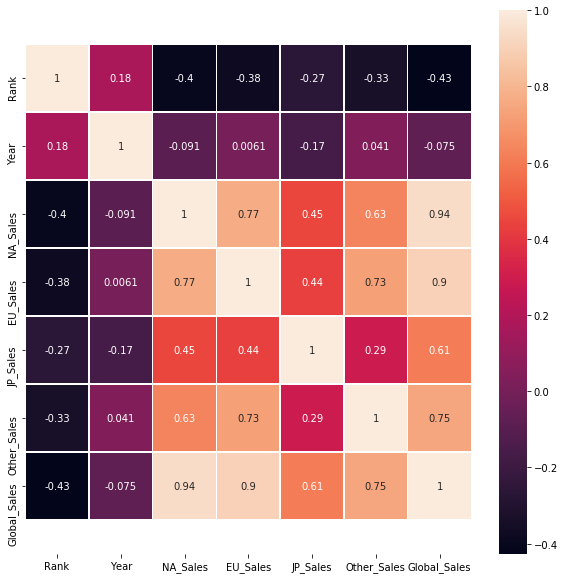

In [17]:
## Determining the relevancy of features using heatmap in calculating the outcome variable
corrmat = dataset.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
#Plotting heat map
g=sns.heatmap(dataset[top_corr_features].corr(),annot=True,linewidths=.5)
b, t = plt.ylim() # Finding the values for bottom and top
b += 0.5 
t -= 0.5 
plt.ylim(b, t) 
plt.show() 

In [18]:
# From the heatmap, we can decipher that the columns NA_Sales,JP_Sales,EU_Sales and Other_Sales are the most useful features
# in determining the global sales
x = dataset.iloc[:,6:-1].values
print(x[0])

[41.49 29.02  3.77  8.46]


In [20]:
## Splitting the dataset into independent and dependent vaiables

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

## Decision Tree

In [25]:
regressor_Tree = DecisionTreeRegressor(random_state=0)
regressor_Tree.fit(x_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [26]:
# Predicting test results
y_pred = regressor_Tree.predict(x_test)

In [29]:
# Calculating r2 score
r2_tree = r2_score(y_test,y_pred)
print(r2_tree)

0.9524915772460725


## Random Forest

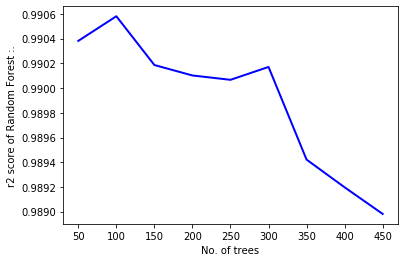

In [32]:
forestRange=range(50,500,50)
scores_list=[]
for i in forestRange: 
    regressor_Forest = RandomForestRegressor(n_estimators=i,random_state=0)
    regressor_Forest.fit(x_train,y_train)
    y_pred = regressor_Forest.predict(x_test)
    scores_list.append(r2_score(y_test,y_pred))
plt.plot(forestRange,scores_list,linewidth=2,color='blue')
plt.xticks(forestRange)
plt.xlabel('No. of trees')
plt.ylabel('r2 score of Random Forest :.')
plt.show()    

In [34]:
# Training the Random Forest on the training model
regressor_Forest = RandomForestRegressor(n_estimators=100,random_state=0)
regressor_Forest.fit(x_train,y_train)
y_pred = regressor_Forest.predict(x_test)
r2_forest = r2_score(y_test,y_pred)
print(r2_forest)


0.9905814002204737


## Linear Support Vector Regression

In [36]:
regressor_SVR = SVR(kernel='linear')
regressor_SVR.fit(x_train,y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [37]:
## Predicting test results
y_pred = regressor_SVR.predict(x_test)

In [38]:
## Calculating r2 score
r2_linearSVR = r2_score(y_test,y_pred)
print(r2_linearSVR)

0.9968270042506322


## Non-linear Support Vector Regression

In [40]:
regressor_NonLinearSVR = SVR(kernel='rbf')
regressor_NonLinearSVR.fit(x_train,y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [41]:
## Predicting test results
y_pred = regressor_NonLinearSVR.predict(x_test)

In [42]:
## Calculating r2 score
r2_NonlinearSVR = r2_score(y_test,y_pred)
print(r2_NonlinearSVR)


0.7448335397536844


# Comparing the r2 scores of different models

In [44]:
labelList = ['Decision Tree','Random Forest','Linear SVR','Non-Linear SVR']
mylist = [r2_tree,r2_forest,r2_linearSVR,r2_NonlinearSVR]
for i in range(0,len(mylist)):
    mylist[i]=np.round(mylist[i]*100,decimals=3)
print(mylist)

[95.249, 99.058, 99.683, 74.483]


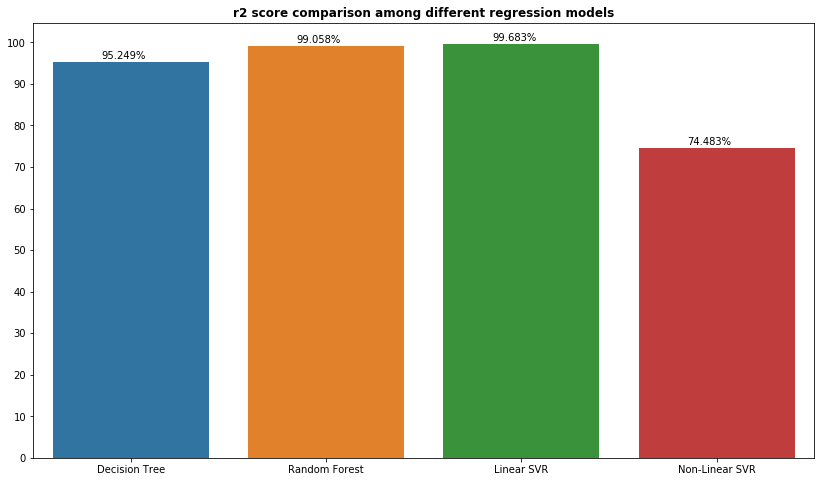

In [45]:
plt.figure(figsize=(14,8))
ax = sns.barplot(x=labelList,y=mylist)
plt.yticks(np.arange(0, 101, step=10))
plt.title('r2 score comparison among different regression models',fontweight='bold')
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.3f}%'.format(height), (x +0.25, y + height + 0.8))
plt.show()